<h1> LOAN LENDING PREDICTION </h1>

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.
Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

<h1>Import Libraries</h1>

<p>Import the usual libraries.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Get The Data</h1>

<p>Use pandas to read loan_data.csv as a dataframe called loans.</p>

In [2]:
loans=pd.read_csv("./CSV/loan_data.csv")
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<p>isnull() is used to print the null values and sum() used to calculate all the null values as sum</p> 

In [3]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<p>head()is used to print the head data</p>

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<p>describe() is used to print the discription of the data</p>

In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<Figure size 2000x2000 with 0 Axes>

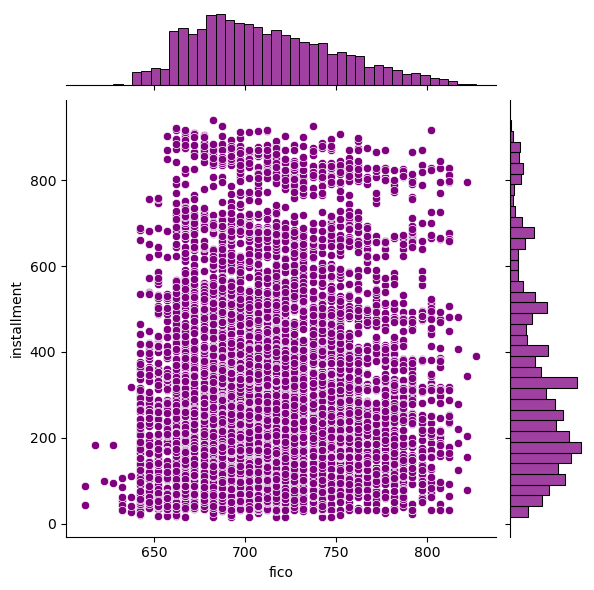

In [6]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='installment',data = loans,color='purple')

<h1>Exploratory Data Analysis</h1>

<P>Let's do some data visualization! We have use seaborn and pandas built-in plotting capabilities .</p>

** Created a histogram of two FICO distributions one for each credit.policy outcome.**


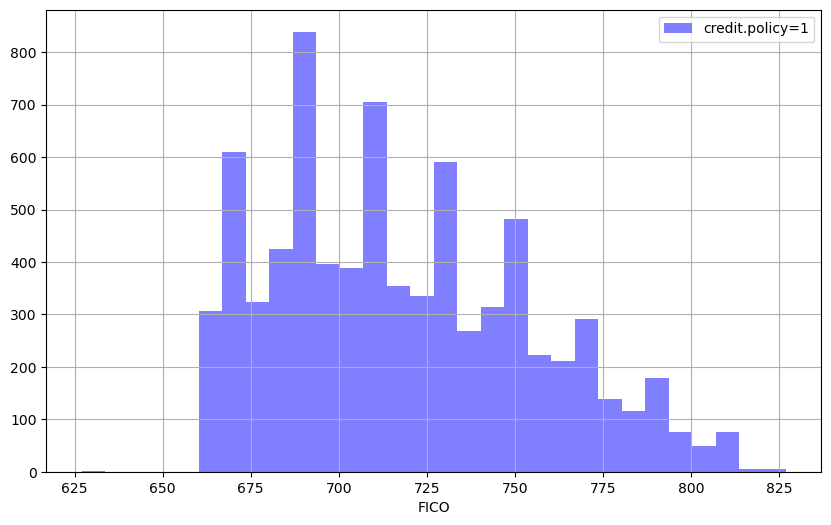

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(color='blue',alpha=0.5,bins=30,label='credit.policy=1')
plt.xlabel('FICO')
plt.legend()

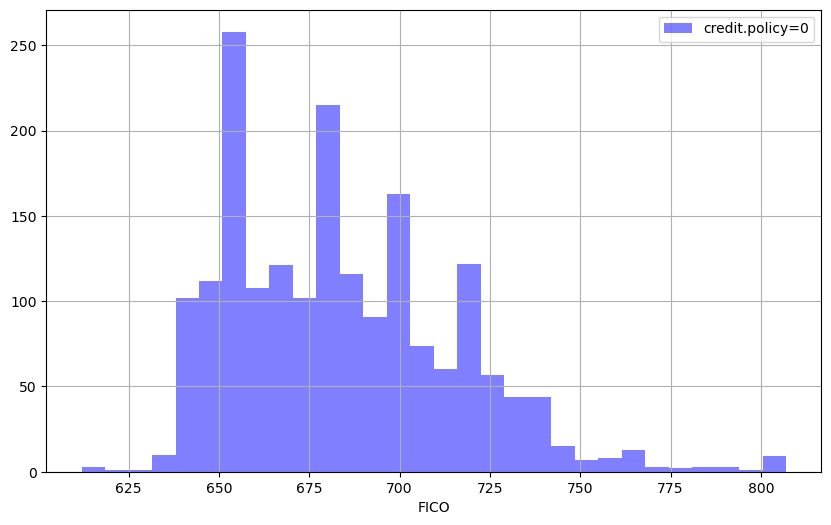

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==0]['fico'].hist(color='blue',alpha=0.5,bins=30,label='credit.policy=0')
plt.xlabel('FICO')
plt.legend()

<p> Now we have created histogram of two FICO distibution in top of another one <p>

Text(0.5, 0, 'FICO')

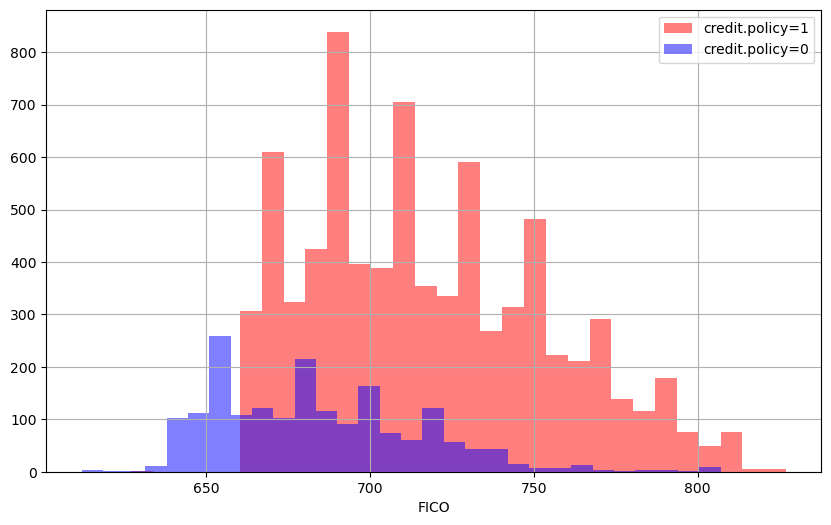

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(color='red',alpha=0.5,bins=30,label='credit.policy=1')
loans[loans['credit.policy']==0]['fico'].hist(color='blue',alpha=0.5,bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

<Figure size 2000x2000 with 0 Axes>

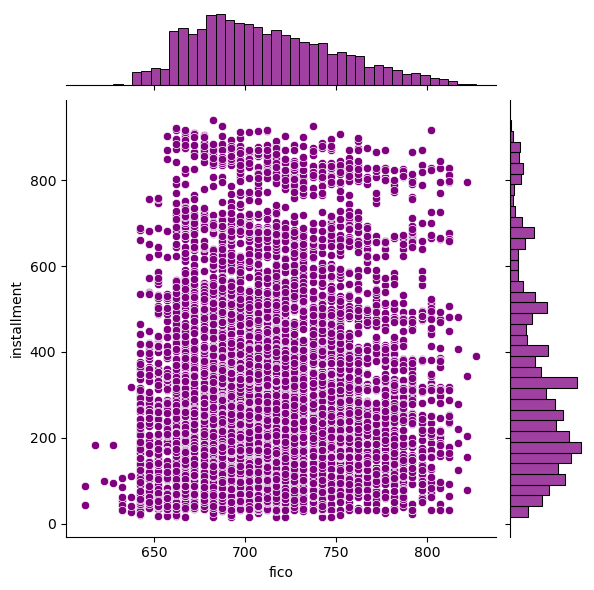

In [10]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='installment',data = loans,color='purple')

Text(0.5, 0, 'FICO')

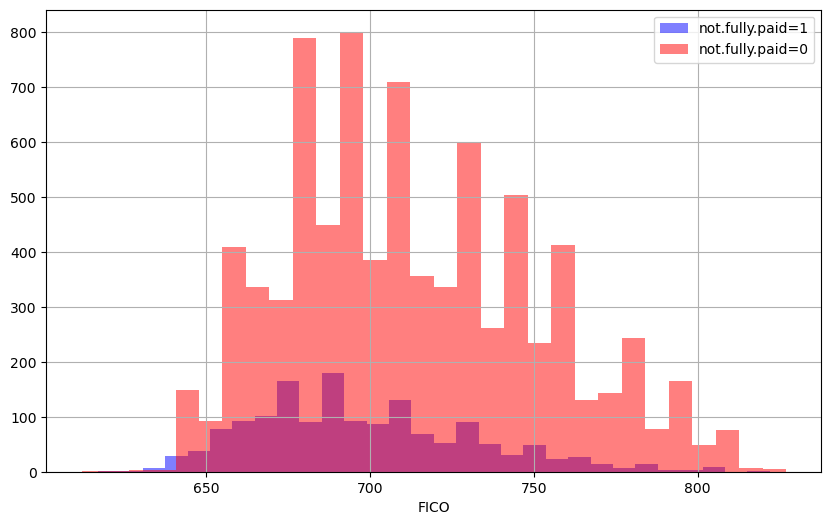

In [11]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<p>Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. </p>

<Axes: xlabel='purpose', ylabel='count'>

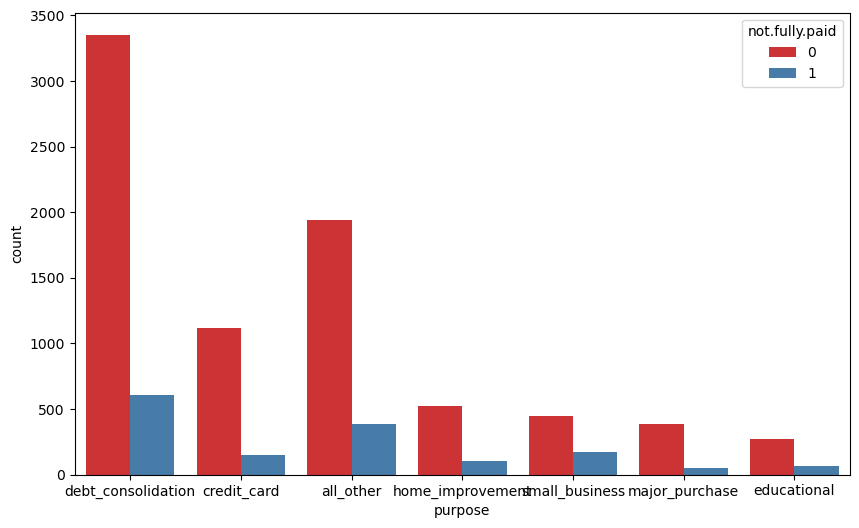

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

<p>Let's see the trend between FICO score and interest rate. </p>

<Figure size 2000x2000 with 0 Axes>

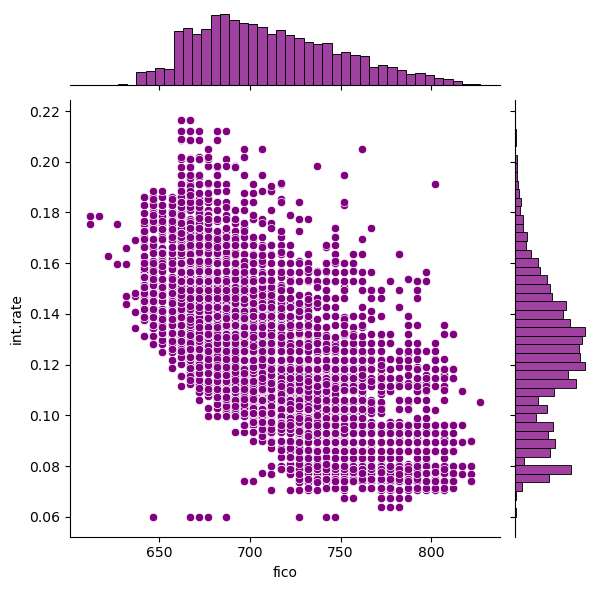

In [13]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='int.rate',data = loans,color='purple')

<Figure size 2000x2000 with 0 Axes>

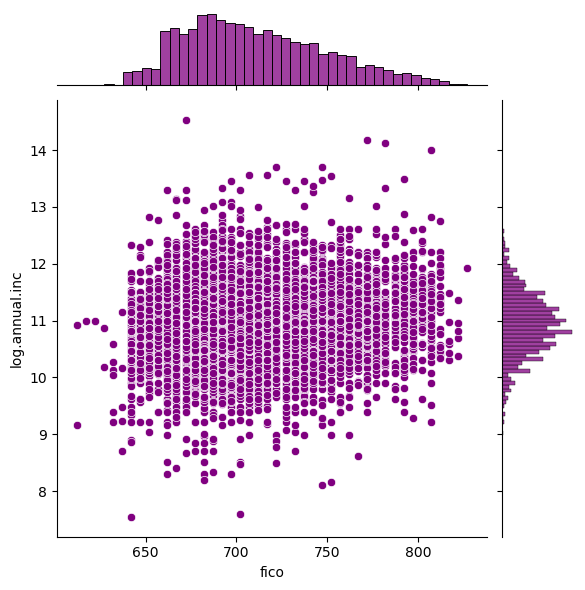

In [14]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='log.annual.inc',data = loans,color='purple')

<Figure size 2000x2000 with 0 Axes>

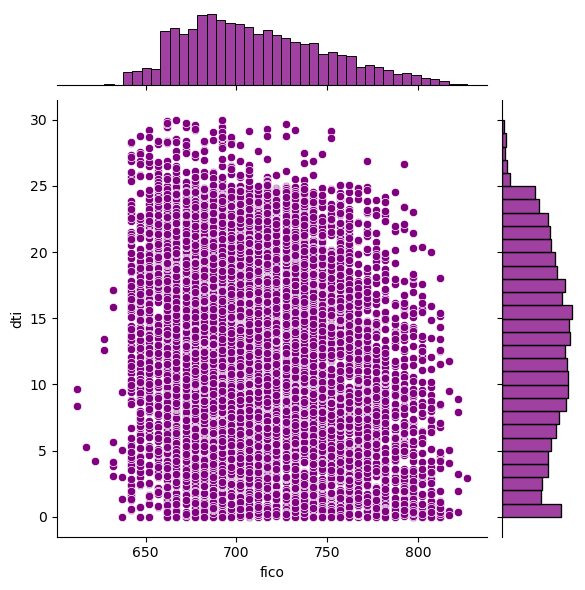

In [15]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='dti',data = loans,color='purple')

<Figure size 2000x2000 with 0 Axes>

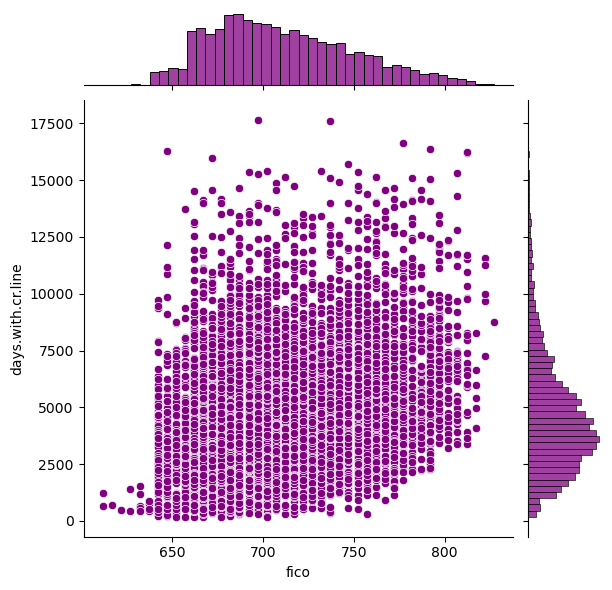

In [16]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='days.with.cr.line',data = loans,color='purple')

<Figure size 2000x2000 with 0 Axes>

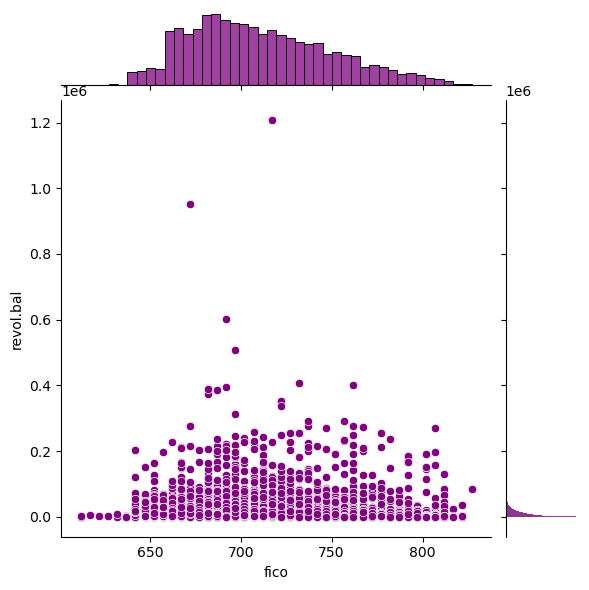

In [17]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='revol.bal',data = loans,color='purple')

<Figure size 2000x2000 with 0 Axes>

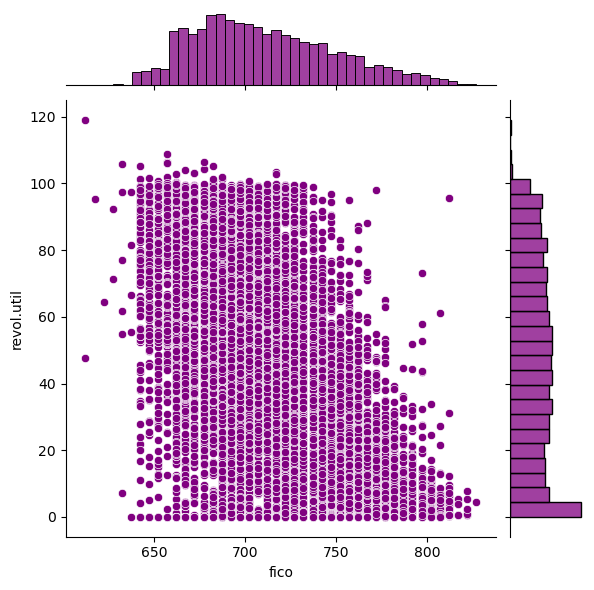

In [18]:
plt.figure(figsize=(20,20))
sns.jointplot(x='fico',y='revol.util',data = loans,color='purple')

Text(0.5, 0, 'FICO')

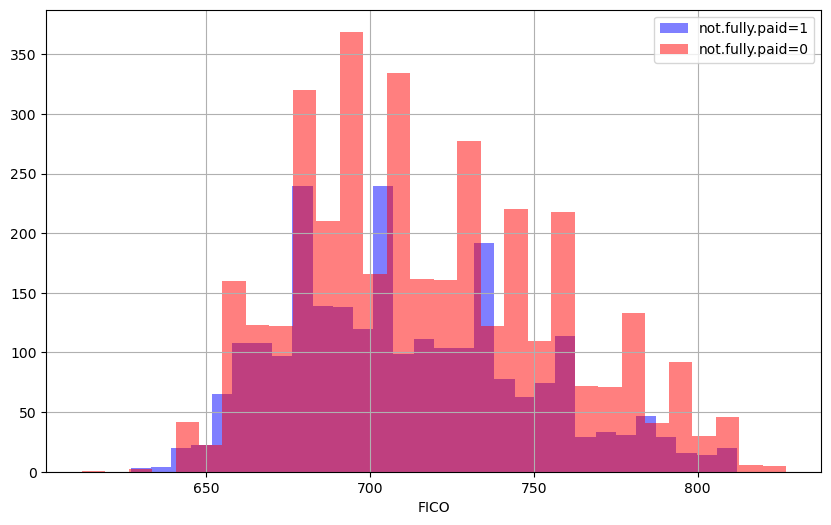

In [19]:
plt.figure(figsize=(10,6))
loans[loans['inq.last.6mths']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['inq.last.6mths']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

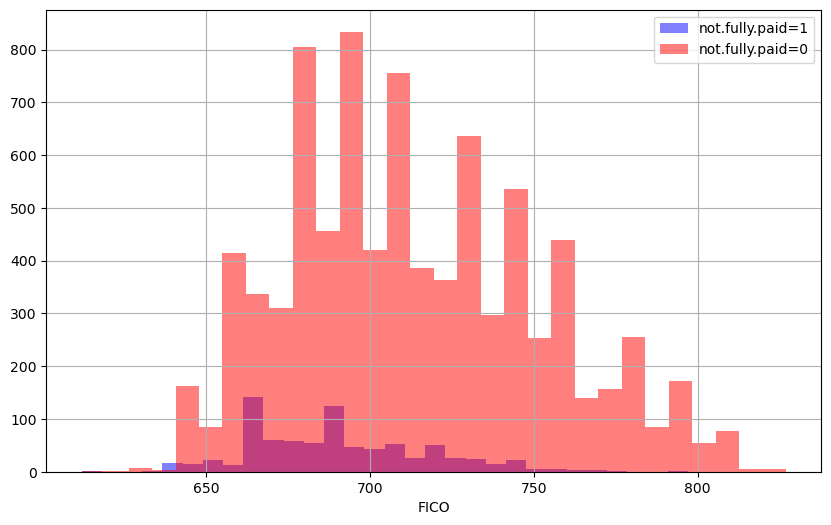

In [20]:
plt.figure(figsize=(10,6))
loans[loans['delinq.2yrs']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['delinq.2yrs']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

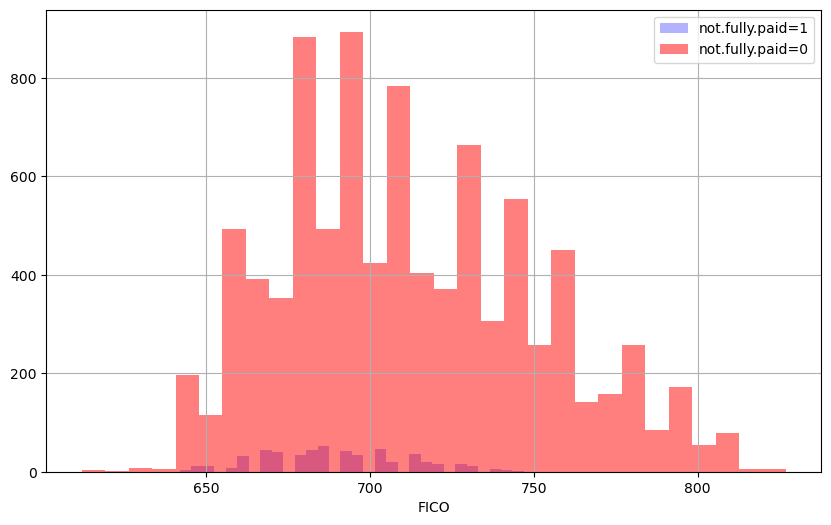

In [21]:
plt.figure(figsize=(10,6))
loans[loans['pub.rec']==1]['fico'].hist(alpha=0.3,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['pub.rec']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<p>Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.</p>

<Figure size 1000x600 with 0 Axes>

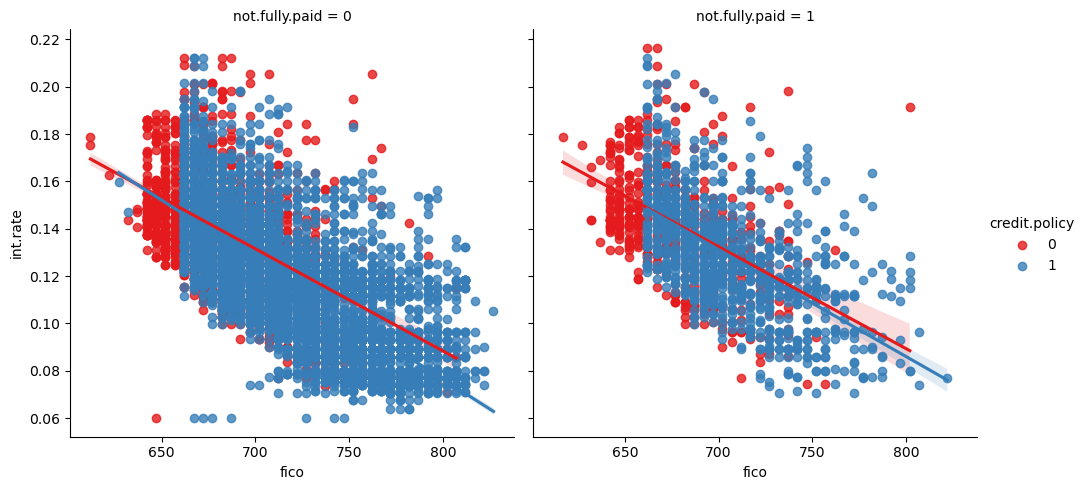

In [22]:
plt.figure(figsize=(10,6))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

<h1>Categorical Features</h1>

In [23]:
cats_feats = ['purpose']
cats_feats

['purpose']

<p>Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.</p>

In [24]:
final_data = pd.get_dummies(loans,columns=cats_feats,drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [25]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

<h1>Train Test Split</h1>

<p>Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set.**</p>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = final_data.drop(['not.fully.paid','int.rate'],axis=1)
y = final_data['not.fully.paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
x

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

<h1>Training a Decision Tree Model</h1>

<p>Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**</p>

In [30]:
from sklearn.tree import DecisionTreeClassifier

<p>Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.</p>

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

<h1>Predictions and Evaluation of Decision Tree</h1>

<p>Create predictions from the test set and create a classification report and a confusion matrix.</p>

In [33]:
predictions = dtree.predict(x_test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2406
           1       0.22      0.23      0.22       468

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.74      2874



In [36]:
print(confusion_matrix(y_test,predictions))

[[2013  393]
 [ 359  109]]


In [37]:
# x_test

In [38]:
# y_test

In [39]:
accuracy_score(y_test,predictions)

0.7383437717466945

<h1>Training the Random Forest model</h1>

<p>Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.</p>

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=300)

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

<h1>Predictions and Evaluation<h1>

In [43]:
rpredictions = rfc.predict(x_test)
rpredictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<p>Now we will evaluate the data </p>

In [44]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [45]:
print(classification_report(y_test,rpredictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.43      0.03      0.05       468

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



In [46]:
print(confusion_matrix(y_test,rpredictions))

[[2390   16]
 [ 456   12]]


In [47]:
accuracy_score(y_test,rpredictions)

0.8357689631176062

<h1> K NEAREST NEIGHBOURS </h1>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
knnpredictions = knn.predict(x_test)
knnpredictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
print(classification_report(y_test,knnpredictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.20      0.01      0.02       468

    accuracy                           0.83      2874
   macro avg       0.52      0.50      0.46      2874
weighted avg       0.73      0.83      0.76      2874



In [51]:
print(confusion_matrix(y_test,knnpredictions))

[[2390   16]
 [ 464    4]]


In [52]:
accuracy_score(y_test,knnpredictions)

0.8329853862212944